In [367]:
import tweepy
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.lines as mlines
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [368]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [369]:
targets=["BBCWorld","CBSNews","CNN","FoxNews","nytimes"]
oldest_tweet = None
sentiments_pd_list=[]
sentiments=[]
colors=[]

senti_mean_list=[]

for x in range(5):
    
    counter=1
    public_tweets = api.user_timeline(targets[x], 
                            count=100, 
                            result_type="recent", 
                            max_id=oldest_tweet)
    
    for tweet in public_tweets:
        comp_senti_sum=0
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                           "target": targets[x]})
        
        counter+=1 
        comp_senti_sum+=compound
        
        if targets[x]=="BBCWorld":
            colors.append("LightSkyBlue")
        elif targets[x]=="CBSNews":
            colors.append("Green")
        elif targets[x]=="CNN":
            colors.append("Red")
        elif targets[x]=="FoxNews":
            colors.append("Blue")
        elif targets[x]=="nytimes":
            colors.append("Gold") 
            
    senti_mean=comp_senti_sum/100
    senti_mean_list.append(senti_mean)             
        
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.to_csv('out.csv')

In [370]:
senti_mean_list

[-0.002263, 0.0, 0.004019, 0.000258, -0.007184]

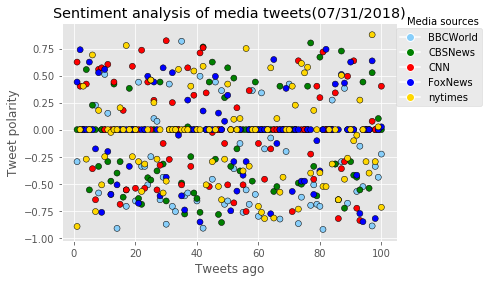

In [371]:
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.scatter(x_vals, y_vals, marker="o",facecolors=colors,edgecolors="black",alpha=1)
plt.title("Sentiment analysis of media tweets(07/31/2018)")
plt.xlabel("Tweets ago")
plt.ylabel("Tweet polarity")
plt.grid(True)
line1 = mlines.Line2D(range(5), range(2), color="white", marker='o',markersize=8,markerfacecolor="LightSkyBlue")
line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8,markerfacecolor="green")
line3 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8,markerfacecolor="Red")
line4 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8,markerfacecolor="Blue")
line5 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=8,markerfacecolor="Gold")
plt.legend((line1,line2,line3,line4,line5),('BBCWorld','CBSNews', 'CNN', 'FoxNews','nytimes'),numpoints=1, loc=1,bbox_to_anchor=(1.27, 1))
plt.text(120, 1,'Media sources', ha='center', va='center')
plt.savefig("Images/sentiment_analysis.png")
plt.show()

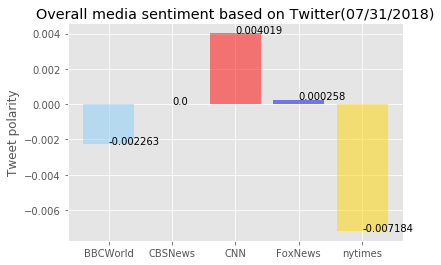

In [372]:
colors=["LightSkyBlue","Green","Red","Blue","Gold"]
x_vals = np.arange(5)
plt.bar(x_vals, senti_mean_list, color=colors, alpha=0.5, align="center")
for a,b in zip(x_vals, senti_mean_list):
    plt.text(a, b, str(b))
tick_locations = [value for value in x_vals]
plt.xticks(tick_locations, ["BBCWorld","CBSNews","CNN","FoxNews","nytimes"])
plt.title("Overall media sentiment based on Twitter(07/31/2018)")
plt.ylabel("Tweet polarity")
plt.savefig("Images/overall_sentiment_analysis.png")
plt.show()